## Testing YOLO Model

In [2]:
import torch
model = torch.jit.load('../models/yolo.torchscript')

In [7]:
from PIL import Image,ImageDraw
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image = Image.open('IPL_captains.jpg')
input_tensor = preprocess(image)
input_tensor = input_tensor.unsqueeze(0)    # > (1, C, H, W)

In [6]:
model.eval()
with torch.no_grad():
    output = model(input_tensor)

print(output.size())

torch.Size([1, 5, 8400])


> ### Using Ultralytics API

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/seono/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
model = YOLO('../models/best.pt')

In [ ]:
results = model('IPL_captains.jpg')


image 1/1 /run/media/seono/P/Surveillance-System/Trainer/IPL_captains.jpg: 352x640 10 faces, 11.4ms
Speed: 16.5ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)


In [ ]:
r = results[0]
boxes = r.boxes.xyxy.cpu().numpy()
confidences = r.boxes.conf.cpu().numpy()
class_ids = r.boxes.cls.cpu().numpy()
class_names = [r.names[int(cls)] for cls in class_ids]

print("Boxes:", boxes)
print("Confidences:", confidences)
print("Classes:", class_ids)
print("Class Names:", class_names)


Boxes: [[     601.24      264.84      681.56      383.41]
 [     936.36      275.99      1019.2      384.43]
 [     705.24      269.94      790.98       381.8]
 [     262.53      266.71      346.15      377.51]
 [     480.86      237.21      571.13      363.38]
 [     160.36      267.76      242.43      389.08]
 [     369.59      264.89      451.53      380.59]
 [      820.6       278.2      900.28      380.58]
 [     1055.2      267.54      1162.4      416.87]
 [     49.512      272.79      129.42      386.25]]
Confidences: [    0.89159     0.87634     0.87402     0.85778     0.85738     0.85557     0.85338     0.85074     0.84423     0.82845]
Classes: [          0           0           0           0           0           0           0           0           0           0]
Class Names: ['face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face']


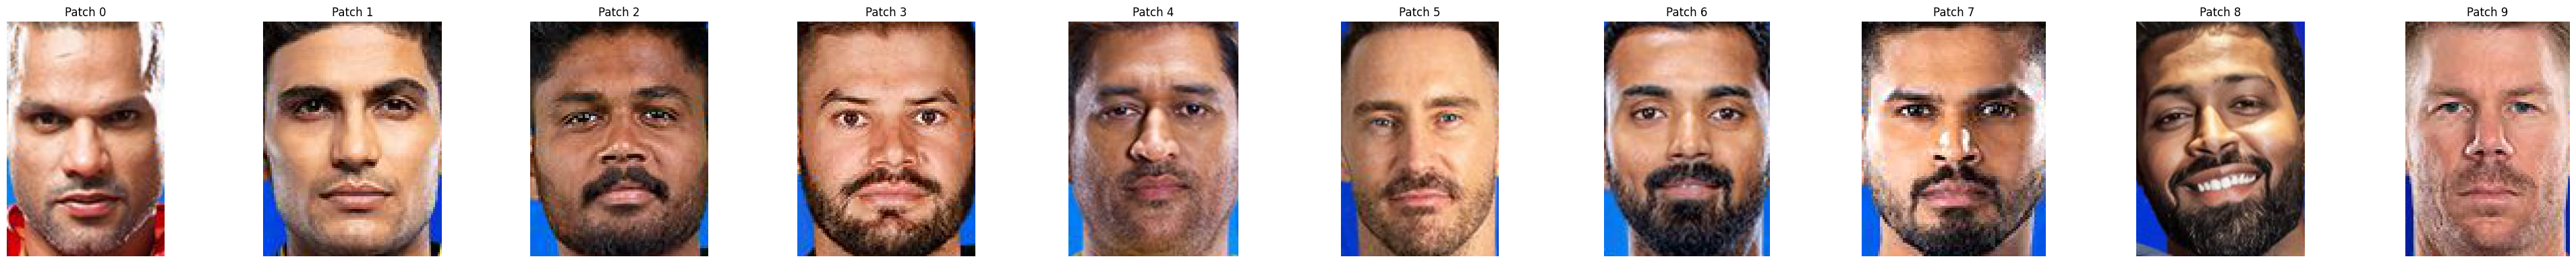

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(r.path).convert("RGB")

num_patches = len(boxes)

fig, axes = plt.subplots(1, num_patches, figsize=(4 * num_patches, 4))
if num_patches == 1:
    axes = [axes]

for idx, (ax, box) in enumerate(zip(axes, boxes)):
    x1, y1, x2, y2 = map(int, box)
    patch = image.crop((x1, y1, x2, y2))
    
    ax.imshow(patch)
    ax.set_title(f"Patch {idx}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Getting Feature Embeddings

In [26]:
import sys
import os

sys.path.append(os.path.abspath('../src'))
from FeatureEmbeddings import FeatureEmbeddings

In [ ]:
from transformers import ViTModel, ViTFeatureExtractor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViTModel.from_pretrained('google/vit-base-patch16-224').to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model.eval()

FE = FeatureEmbeddings(model, feature_extractor)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

(…)dda6f3b8b58e7256e8f44b4ea6aa9696162ccb5d:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/home/seono/anaconda3/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
